**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/
* Professor's Sample Code for Prediction: https://github.com/Rising-Stars-by-Sunshine/stats201-tutorial-prediction/blob/main/code/Analyze_Data_Machine_Learning_for_Predicting_Market_Congestion.ipynb
* Haowen Ji's Help with regression: https://github.com/Rising-Stars-by-Sunshine/stats201-prediction-Haowen/blob/main/code/Analyze_Data_Machine_Learning_for_Predicting.ipynb

# Part I. Import and Inspect Data

## 1.1 import packages

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10) 
plt.rcParams["lines.linewidth"] = 2 
plt.style.use("ggplot")

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose #Describes the time data
from statsmodels.tsa.stattools import adfuller #Check if data is stationary
from statsmodels.graphics.tsaplots import plot_acf #Compute lag for ARIMA
from statsmodels.graphics.tsaplots import plot_pacf #Compute partial lag for ARIMA
from statsmodels.tsa.arima_model import ARIMA #Predictions and Forecasting


from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error


In [4]:
random.seed(42)

## 1.2 import train and test data for regression

In [9]:
R_train = pd.read_csv("/content/Regression_Train.csv")
R_test = pd.read_csv("/content/Regression_Test.csv")

In [11]:
R_train=R_train.dropna()

In [12]:
R_test.isna().sum()

Unnamed: 0        0
Total Score       0
MatchTime         0
Total Shooting    0
dtype: int64

In [13]:
R_train.head()

,Unnamed: 0,Total Score,MatchTime,Total Shooting
0,0,2,2022-05-08 20:00:00,20
1,1,4,2022-06-08 12:30:00,20
2,2,2,2022-06-08 15:00:00,22
3,3,3,2022-06-08 15:00:00,27
4,4,2,2022-06-08 15:00:00,28


In [14]:
R_test.head()

,Unnamed: 0,Total Score,MatchTime,Total Shooting
0,146,4,2022-12-26 12:30:00,25
1,147,3,2022-12-26 15:00:00,27
2,148,3,2022-12-26 15:00:00,19
3,149,3,2022-12-26 15:00:00,20
4,150,4,2022-12-26 15:00:00,21


# Part II. Machine Learning Regression

## 2.1 important global packages

In [15]:
from sklearn.metrics import r2_score

## 2.2 Define the Train and Test (X, y)

In [16]:
R_train.head()

,Unnamed: 0,Total Score,MatchTime,Total Shooting
0,0,2,2022-05-08 20:00:00,20
1,1,4,2022-06-08 12:30:00,20
2,2,2,2022-06-08 15:00:00,22
3,3,3,2022-06-08 15:00:00,27
4,4,2,2022-06-08 15:00:00,28


In [17]:
X_train = pd.DataFrame(R_train['Total Shooting'])
y_train = pd.DataFrame(R_train['Total Score'])

In [18]:
R_test.head()

,Unnamed: 0,Total Score,MatchTime,Total Shooting
0,146,4,2022-12-26 12:30:00,25
1,147,3,2022-12-26 15:00:00,27
2,148,3,2022-12-26 15:00:00,19
3,149,3,2022-12-26 15:00:00,20
4,150,4,2022-12-26 15:00:00,21


In [19]:
X_test = pd.DataFrame(R_test['Total Shooting'])
y_test = pd.DataFrame(R_test['Total Score'])

In [20]:
y_test.head()

,Total Score
0,4
1,3
2,3
3,3
4,4


## 2.3 Linear Regression

In [21]:
from sklearn import linear_model

In [22]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [23]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.018834673473887564


In [24]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,2.860982
1,2.944637
2,2.610015
3,2.651843
4,2.693670
...,...
68,2.902810
69,2.986465
70,2.902810
71,2.944637


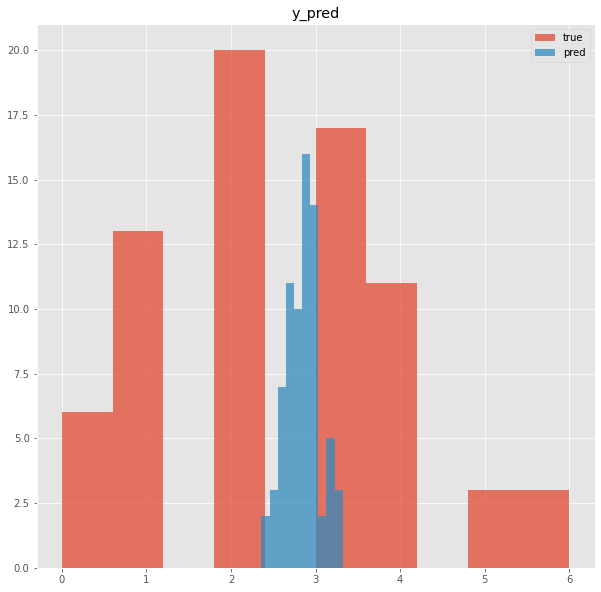

In [25]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


In [26]:
y_plot = y_test.copy()
y_plot["y_pred"] = y_pred.values
y_plot.head()

,Total Score,y_pred
0,4,2.860982
1,3,2.944637
2,3,2.610015
3,3,2.651843
4,4,2.693670


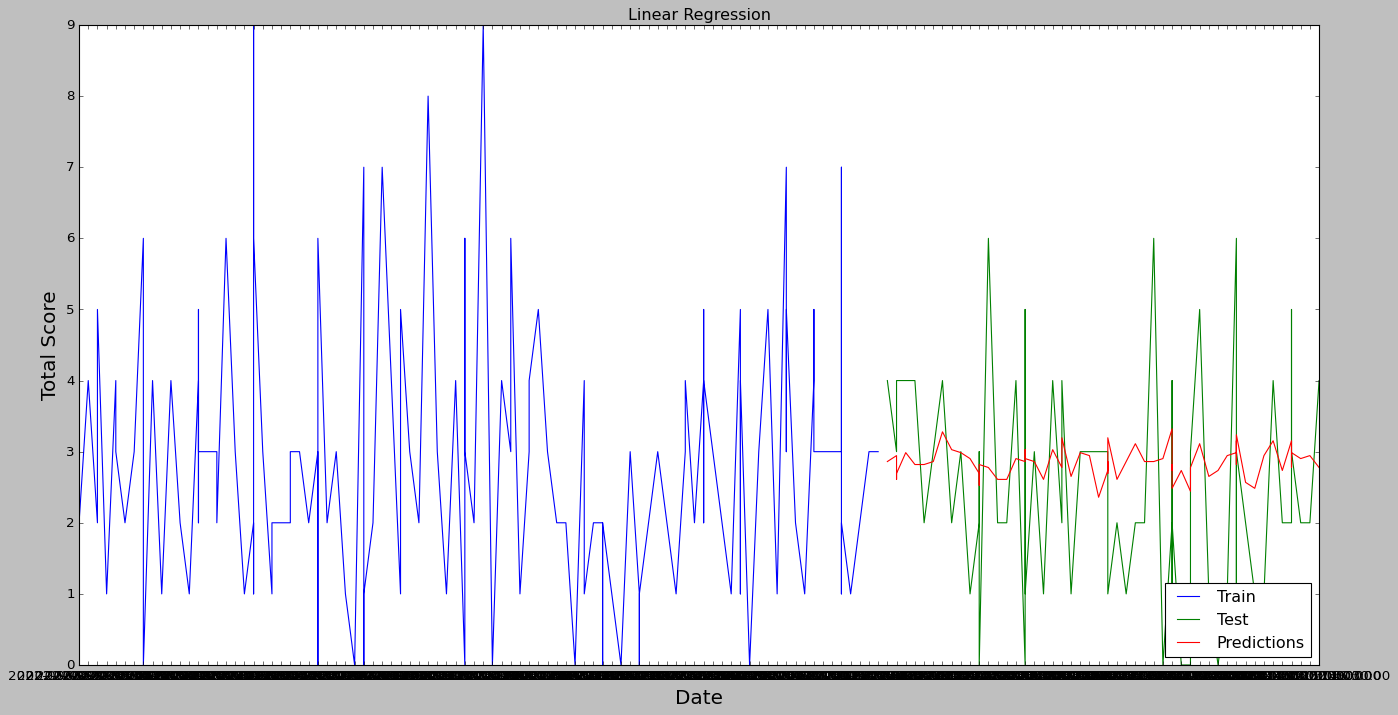

In [58]:
plt.figure(figsize=(20, 10))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Score', fontsize=18)
plt.plot(R_train['MatchTime'],R_train['Total Score'])
plt.plot(R_test['MatchTime'],y_plot[['Total Score', 'y_pred']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

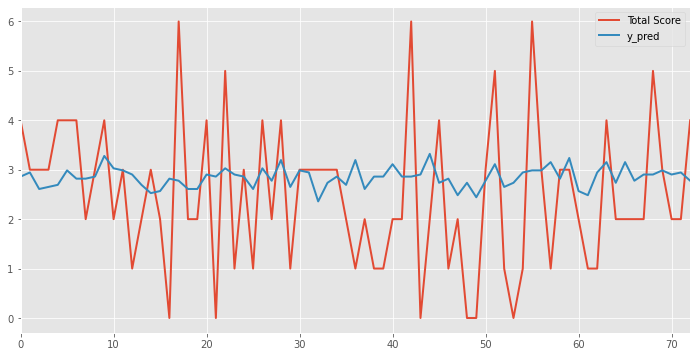

In [29]:
y_plot[['Total Score', 'y_pred']].iloc[:200].plot(
    figsize=(12, 6)).autoscale(axis='x', tight=True)

### 2.4 Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-61-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [62]:
# calculate R2
from sklearn.metrics import r2_score

In [63]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.19494986079251908


In [64]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,3.043592
1,3.644439
2,2.498403
3,2.821961
4,3.444780
...,...
68,3.582247
69,2.523559
70,3.582247
71,3.644439


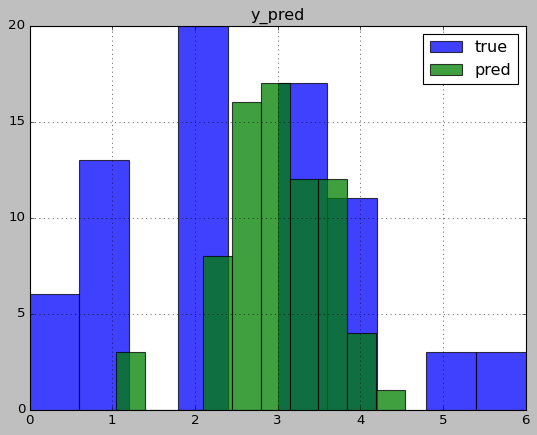

In [65]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Part III. **Classification**

### 3.1 Import Packages

In [30]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [32]:
plt.style.use('classic')
random.seed(42)

### 3.2 Import train and test data for Classification

In [33]:
C_train = pd.read_csv("/content/Classification_Train.csv")
C_test = pd.read_csv("/content/Classification_Test.csv")

In [34]:
C_train.isna().sum()

Unnamed: 0        0
Total Score       0
MatchTime         0
Total Shooting    0
dtype: int64

### 3.3 Drop nan for classification Data

In [35]:
C_train =C_train.dropna()

In [36]:
C_train.head()

,Unnamed: 0,Total Score,MatchTime,Total Shooting
0,0,2,2022-05-08 20:00:00,20
1,1,4,2022-06-08 12:30:00,20
2,2,2,2022-06-08 15:00:00,22
3,3,3,2022-06-08 15:00:00,27
4,4,2,2022-06-08 15:00:00,28


In [37]:
C_test.isna().sum()

Unnamed: 0        0
Total Score       0
MatchTime         0
Total Shooting    0
dtype: int64

## 3.4 Decision Tree Classifier

### 3.4.1 Define the Train and Test (X,y)

In [38]:
C_train.head()

,Unnamed: 0,Total Score,MatchTime,Total Shooting
0,0,2,2022-05-08 20:00:00,20
1,1,4,2022-06-08 12:30:00,20
2,2,2,2022-06-08 15:00:00,22
3,3,3,2022-06-08 15:00:00,27
4,4,2,2022-06-08 15:00:00,28


In [39]:
X_train = pd.DataFrame(np.array(C_train['Total Shooting']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['Total Score'].astype(int))

In [40]:
C_test.head()

,Unnamed: 0,Total Score,MatchTime,Total Shooting
0,146,4,2022-12-26 12:30:00,25
1,147,3,2022-12-26 15:00:00,27
2,148,3,2022-12-26 15:00:00,19
3,149,3,2022-12-26 15:00:00,20
4,150,4,2022-12-26 15:00:00,21


In [43]:
X_test = pd.DataFrame(np.array(C_test['Total Shooting']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['Total Score'].astype(int))

### 3.4.2 Import base packages

In [42]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

### 3.4.3 Decision Tree Classifer

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

In [46]:
y_pred= mdl.predict(X_test)
y_pred

array([1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 1, 3, 4, 1, 1, 3, 3, 1, 1, 1, 4, 1,
       1, 4, 1, 1, 1, 1, 2, 3, 3, 3, 3, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 4,
       3, 0, 3, 0, 0, 3, 1, 2, 3, 0, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 0, 3,
       1, 4, 4, 3, 4, 3, 1])

### 3.5 Evaluations

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.12      0.23      0.15        13
           2       0.17      0.05      0.08        20
           3       0.33      0.53      0.41        17
           4       0.14      0.09      0.11        11
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3

    accuracy                           0.22        73
   macro avg       0.15      0.18      0.15        73
weighted avg       0.19      0.22      0.19        73



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.6 Results

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


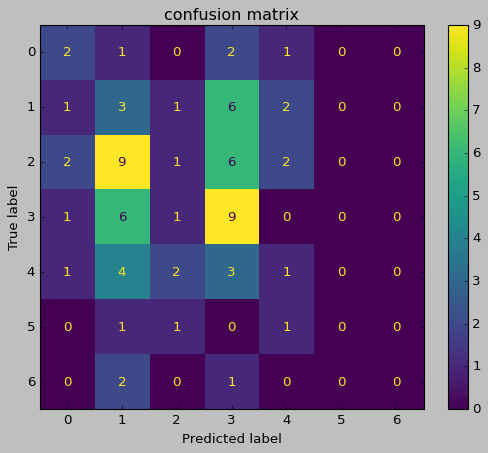

In [48]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()